# Import Libraries & Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('covid_19_clean_complete.csv')
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# Clean and Prepare Data

In [4]:

df.columns = df.columns.str.strip().str.replace(' ', '_')


df['Date'] = pd.to_datetime(df['Date'])

df.isnull().sum()


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO_Region,0


# Clean and Prepare Data

/tmp/ipython-input-12-2985814260.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='magma')


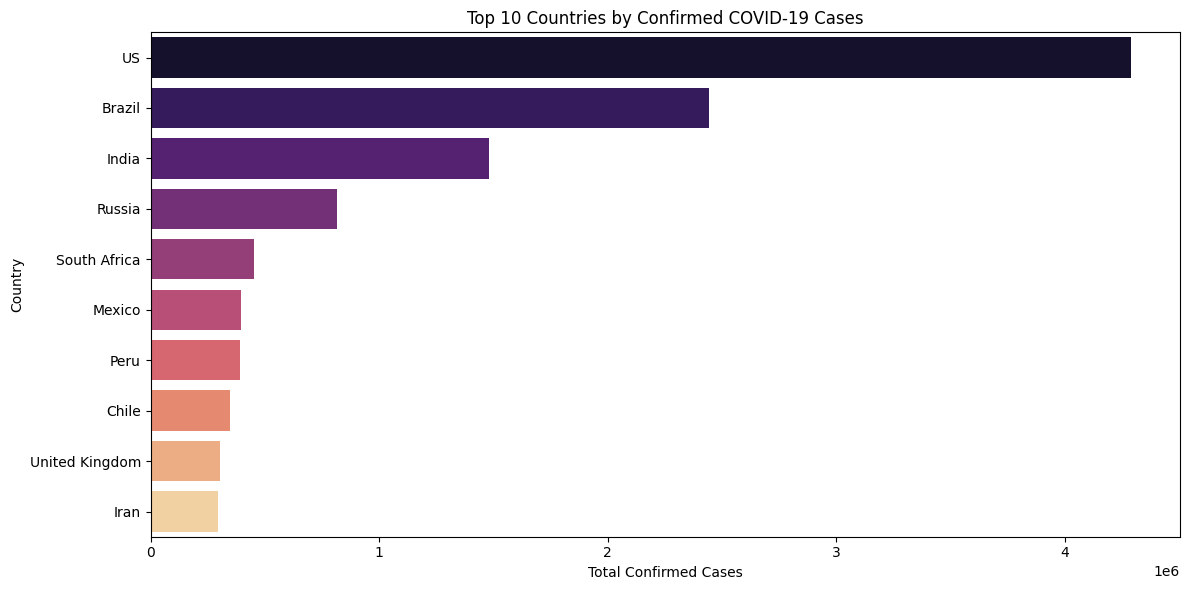

In [12]:

latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date]

top10 = latest_df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index, palette='magma')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# New Cases Over Time (for Selected Countries)

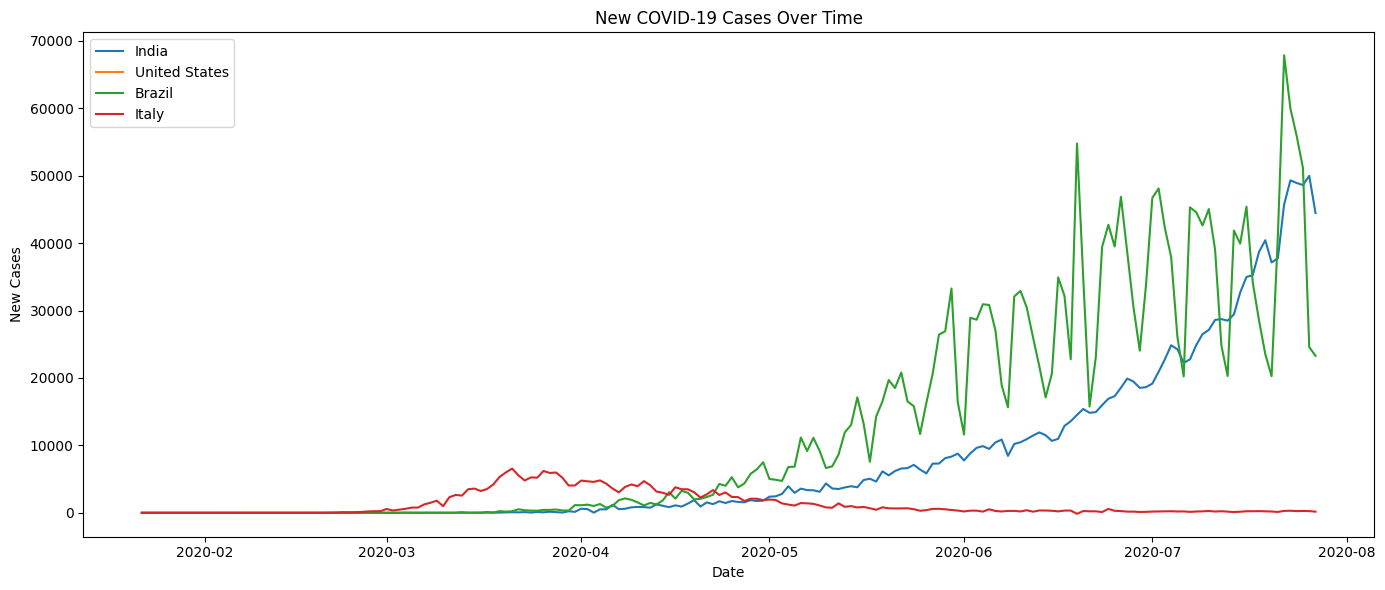

In [13]:

df_sorted = df.sort_values(by=['Country/Region', 'Date'])
df_sorted['New_Cases'] = df_sorted.groupby('Country/Region')['Confirmed'].diff().fillna(0)


selected = ['India', 'United States', 'Brazil', 'Italy']

plt.figure(figsize=(14,6))
for country in selected:
    country_data = df_sorted[df_sorted['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['New_Cases'], label=country)

plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


# Deaths vs Recoveries (Bar Chart)

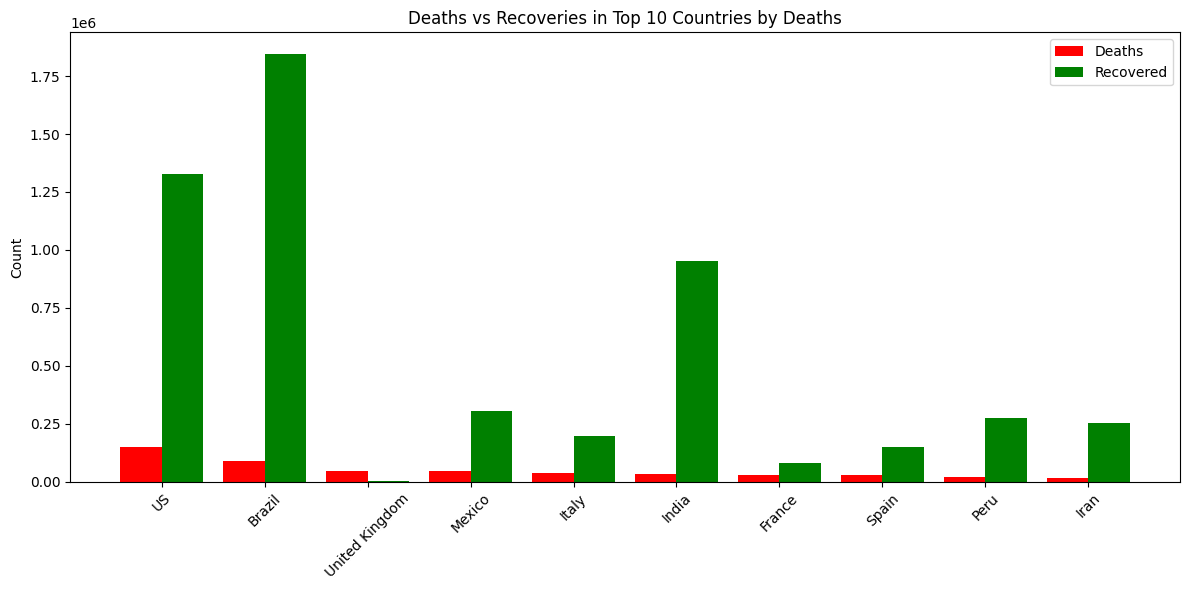

In [14]:

deaths = latest_df.groupby('Country/Region')['Deaths'].sum()
recovered = latest_df.groupby('Country/Region')['Recovered'].sum()

top_countries = deaths.sort_values(ascending=False).head(10).index


plt.figure(figsize=(12,6))
bar_width = 0.4
x = np.arange(len(top_countries))

plt.bar(x, deaths[top_countries], width=bar_width, label='Deaths', color='red')
plt.bar(x + bar_width, recovered[top_countries], width=bar_width, label='Recovered', color='green')
plt.xticks(x + bar_width/2, top_countries, rotation=45)
plt.ylabel('Count')
plt.title('Deaths vs Recoveries in Top 10 Countries by Deaths')
plt.legend()
plt.tight_layout()
plt.show()


# Line Graph for India’s Growth

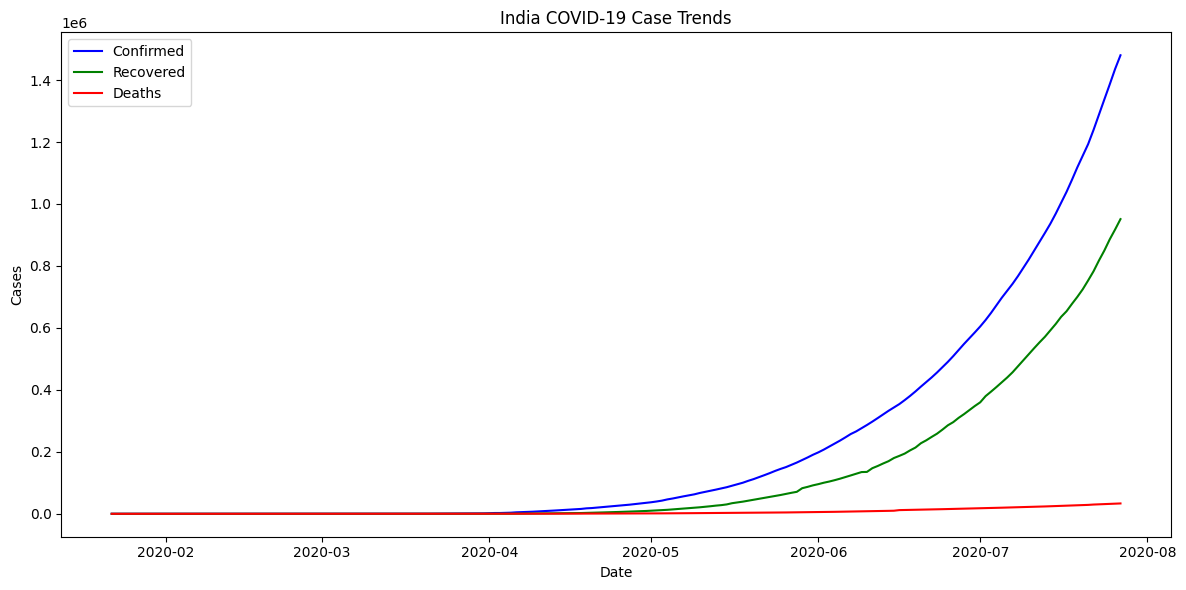

In [15]:
india = df[df['Country/Region'] == 'India']

plt.figure(figsize=(12,6))
plt.plot(india['Date'], india['Confirmed'], label='Confirmed', color='blue')
plt.plot(india['Date'], india['Recovered'], label='Recovered', color='green')
plt.plot(india['Date'], india['Deaths'], label='Deaths', color='red')
plt.title('India COVID-19 Case Trends')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.tight_layout()
plt.show()


# Death Rate Calculation

/tmp/ipython-input-16-4001049322.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_death_rate.values, y=top10_death_rate.index, palette='coolwarm')


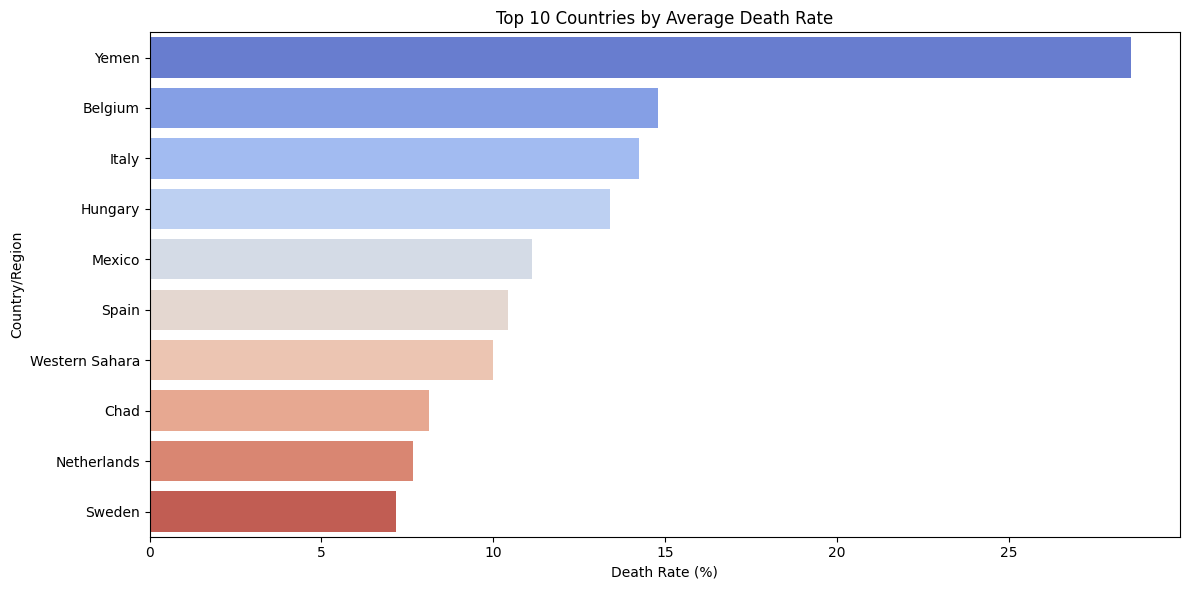

In [16]:

df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df['Death_Rate'] = df['Death_Rate'].fillna(0)


top10_death_rate = df[df['Date'] == latest_date].groupby('Country/Region')['Death_Rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top10_death_rate.values, y=top10_death_rate.index, palette='coolwarm')
plt.title('Top 10 Countries by Average Death Rate')
plt.xlabel('Death Rate (%)')
plt.tight_layout()
plt.show()
